# Smoker Status Prediction

## Objective

In this challenge, we will:
- Explore a U.S. health insurance dataset,

- Apply the full machine learning workflow,

- And Build a classification model that predicts whether an individual is a
smoker based on demographic and health-related features.

Task here: Predict whether an individual is a smoker using a health insurance dataset and the full ML workflow.

## Dataset

 The [dataset](https://drive.google.com/file/d/13MqmJ3x_qKazNEnhYrkZ5y0PJywNi5Wb/view?usp=sharing) variables include:
- age: Age of the beneficiary
- sex: Gender (female/male)
- bmi: Body Mass Index
- children: Number of dependents
- region: Residential region
- charges: Medical cost
- smoker: Whether the individual smokes or not

## Modeling Approaches and Strategy Overview

Throughout this project, multiple models and strategies were explored including baseline logistic regression, class weighting, SMOTE, hyperparameter tuning with Grid Search, and AdaBoost to identify the best-performing approach for handling class imbalance and accurately predicting smoker status.

1. Standard Logistic Regression: baseline model,

2. Balanced Logistic Regression: to handle class imbalance via algorithm-level weighting,

3. Grid Search Logistic Regression: to tune hyperparameters and regularization,

4. AdaBoost: an ensemble method for boosting performance,

5. Logistic Regression with SMOTE: a data-level imbalance solution.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Load, Read & Visualize the data
Data now is stored on disk in a csv (Comma Separated Values) file. To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function.

In [ ]:
#read CSV file in Pandas
data = pd.read_csv('insurance - insurance.csv')

#display first 10 rows
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

In [ ]:
#get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Check for duplicate Rows**

In [ ]:
#Check for duplicate rows
print("Duplicate rows before removal:", data.duplicated().sum())

Duplicate rows before removal: 1


In [ ]:
#Remove duplicates
data.drop_duplicates(inplace=True)

In [ ]:
#Confirm removal
print("Duplicate rows after removal:", data.duplicated().sum())

Duplicate rows after removal: 0


**Check for outliers**

In [ ]:
#Detect Outliers using IQR
#define numeric columns to check
numeric_cols = ['bmi', 'charges']

#Dictionary for outlier counts
outlier_counts = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    #Count outliers
    count = data[(data[col] < lower) | (data[col] > upper)].shape[0]
    outlier_counts[col] = count

#Print the outliers per column
print("Outlier count per column (before removal):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outlier count per column (before removal):
bmi: 9
charges: 139


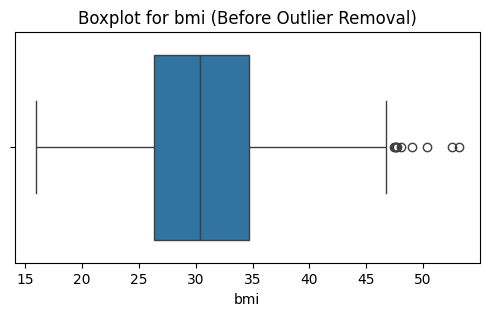

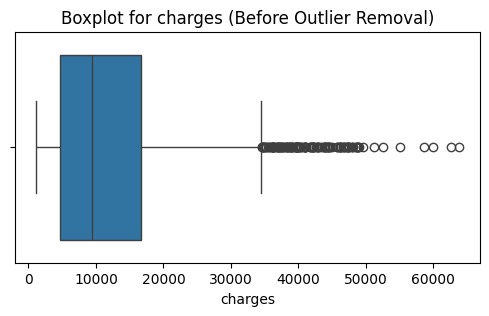

In [ ]:
#Boxplot to visualize outliers
import seaborn as sns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col} (Before Outlier Removal)')
    plt.show()

After testing both approaches, I found that keeping outliers improved model performance. In this dataset, outliers in medical charges and BMI weren't errors but reflected real, informative cases, particularly for smokers.

High medical charges are likely indicators of smoker status. Removing these values would reduce the model’s ability to learn important distinctions between smokers and non-smokers. Retaining outliers allowed the model to learn more meaningful and important patterns, and also to better distinguish smokers from non-smokers, which improved recall and F1-score for the smoker class.

**Check missing values per column**

In [ ]:
print('missing values per column')
print(data.isnull().sum())

missing values per column
age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
#Handle missing values
data['bmi'].fillna(data['bmi'].median(), inplace=True)

/tmp/ipython-input-12-2921946869.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [ ]:
print(data.isnull().sum()) #double check if all missing values are filled now

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Only 3 missing values were found in the bmi column. These were filled using the median BMI value to maintain distributional integrity, especially in the presence of outliers.

##3. Convert Categorical columns to numerical using LabelEncoder



In [ ]:
from sklearn.preprocessing import LabelEncoder

#create a copy for modeling
df = data.copy()

#encode target variable into yes=1, no=0
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])

#encode 'sex' and 'region'
df = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)


In [ ]:
df.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,False,False,False,True
1,18,33.770,1,0,1725.55230,True,False,True,False
2,28,33.000,3,0,4449.46200,True,False,True,False
3,33,22.705,0,0,21984.47061,True,True,False,False
4,32,28.880,0,0,3866.85520,True,True,False,False


The original dataset contained 1,338 rows and 7 columns, with 3 missing values in the bmi column and 1 duplicate row. To ensure data integrity, the duplicate was removed, and the missing bmi values were handled through median imputation, which is robust to outliers (so, now we have 1,337 rows and 7 columns).

For modeling purposes, categorical variables such as sex, smoker, and region were transformed into numerical format using Label Encoding and One-Hot Encoding, making the data compatible with ML Algorithms.

With missing values addressed, duplicate values removed, and categorical features encoded, the dataset is now clean, complete, and ready for building a strong and reliable classification model.

## 4. Some Visualizations

## A. Distribution of Smoker vs. Non-Smoker

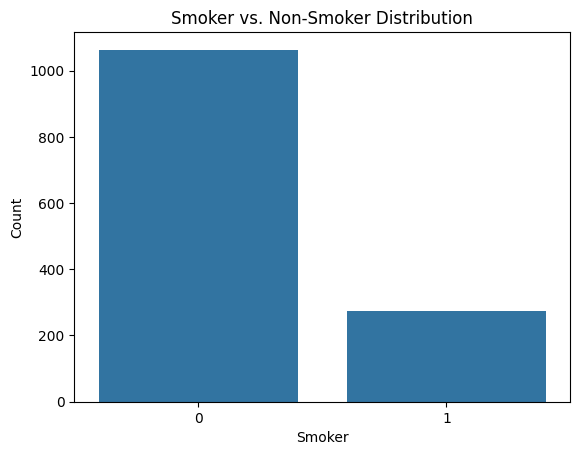

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#countplot
sns.countplot(data=df, x='smoker')
plt.title("Smoker vs. Non-Smoker Distribution")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

This clearly shows a class imbalalnce. Only a small percentage of people smoke (label 1), whereas the majority are non-smokers (label 0).

Because it could result in a bias toward predicting the majority class, this imbalance should be taken into account while training the model.

## B. Age Distribution by Smoker Status

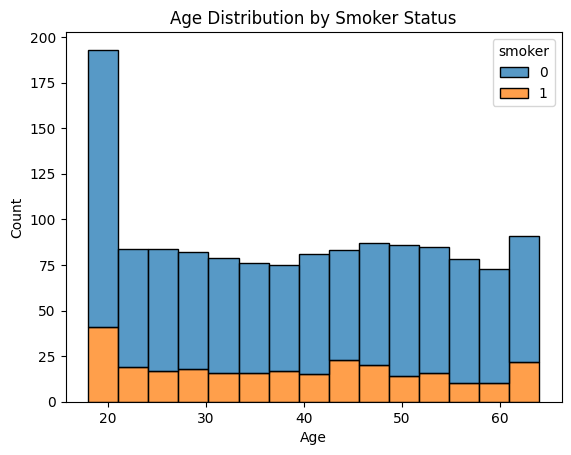

In [ ]:
#histogram
sns.histplot(data=df, x='age', hue='smoker', multiple='stack', bins=15)
plt.title("Age Distribution by Smoker Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

People of all ages are more likely to be non-smokers, according to the histogram. However, compared to other age categories, a high number of smokers are in the 20 to 30 and 45 to 60 age ranges.

This suggests that age may be a relevant feature in predicting smoker status, although the relationship isn't strongly concentrated in one specific age category.

## C. BMI Distribution by Smoker Status

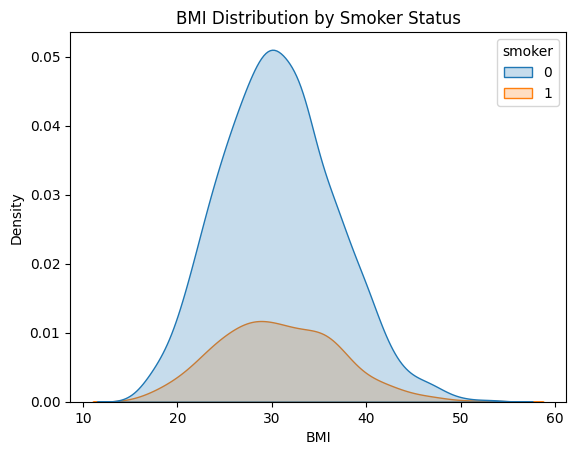

In [ ]:
sns.kdeplot(data=df, x='bmi', hue='smoker', fill=True)
plt.title("BMI Distribution by Smoker Status")
plt.xlabel("BMI")
plt.show()

With the majority of people falling between 25 and 35, the BMI distributions for smokers and non-smokers seem to be centered around the same values. The smokers category, on the other hand, exhibits a somewhat reduced density, suggesting fewer data points overall.

While BMI alone may not be a strong important factor, it can still have some value when combined with other features in the classification model.

## D. Charges vs. Smoker

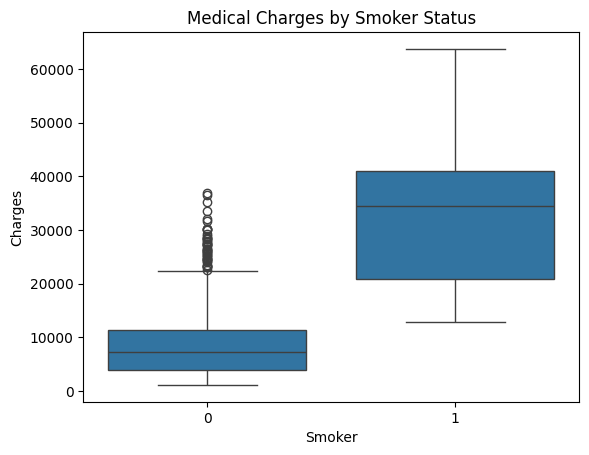

In [ ]:
sns.boxplot(data=df, x='smoker', y='charges')
plt.title("Medical Charges by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()


The boxplot shows a clear difference in medical charges between smokers and non-smokers.

Smokers tend to have significantly higher charges, with both the median and overall range, much greater than those of non-smokers. This includes a significant number of outliers, which are valid and reflective of real-world medical costs.

These findings strongly suggest that the charges is a highly important feature for predicting smoker status.

## E. Smoker Status across Regions

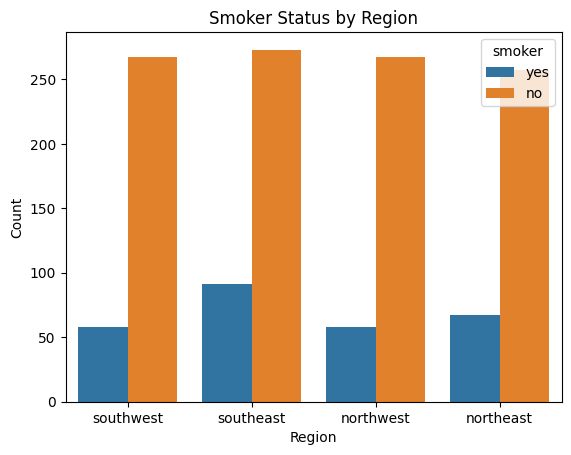

In [ ]:
#Re-load the original data to restore 'region' just for the purpose of checking smoker status across regions
df_visualization = pd.read_csv("insurance - insurance.csv")

#because when we did one hot encoding there is no "region" column anymore,
#it got replaced by dummy variables: region_northwest, region_southeast, and	region_southwest

sns.countplot(data=df_visualization, x='region', hue='smoker')
plt.title("Smoker Status by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


We can see that there is a majority of non-smokers in every location, and the distribution of smokers vs. non-smokers is very stable in all regions.

However, compared to other regions, the southeast seems to have a significantly larger population of smokers.


This suggests that while region may not be a strong predictor alone, it could still add a small value when combined with other features in the model.

## F. Correlation Heatmap

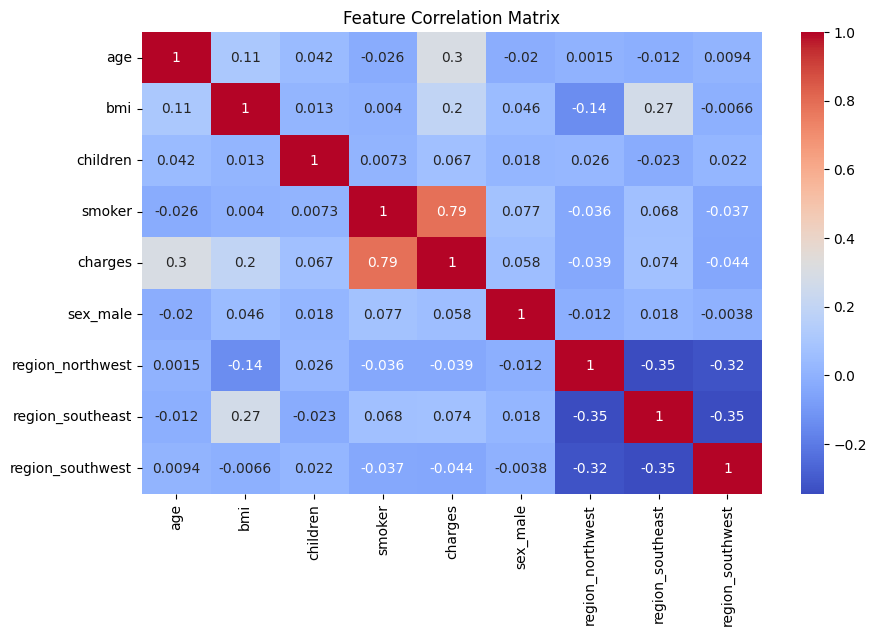

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

The correlation heatmap shows that charges has the strongest positive correlation with the smoker variable (0.79), indicating that higher medical expenses are associated with being a smoker.

This reinforces the earlier visual insights and suggests that charges will be a key predictor in the classification model.

Regarding the other features, including age, bmi, sex, children, and region, they show very weak correlations with smoker status, individually contributing weakly or moderately to prediction. However, they may still add a value if combined with other features or in more complex models such as ensemble methods.

## 5. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
#Prepare features and target
X = df.drop('smoker', axis=1)
y = df['smoker']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#stratify = y here to ensure balanced and fair model evaluation since we have imbalanced dataset where non-smokers dominate.
#So, in this case, both training and testing sets will keep this 20–80 ratio not ending up with for example 5% smokers in the test set
#which will result in inaccurate and unreliable results.


In [ ]:
#features scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Model Building - Standard Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Model Training
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)


In [ ]:
#Flatten them into 1D format
y_test_flat = y_test.to_numpy() #for series
y_pred_flat = y_pred


In [ ]:
#Model Evaluation metrics
print("Accuracy:", accuracy_score(y_test_flat, y_pred_flat))
print("Precision:", precision_score(y_test_flat, y_pred_flat))
print("Recall:", recall_score(y_test_flat, y_pred_flat))
print("F1 Score:", f1_score(y_test_flat, y_pred_flat))

Accuracy: 0.9626865671641791
Precision: 0.9245283018867925
Recall: 0.8909090909090909
F1 Score: 0.9074074074074074


In [ ]:
#Confusion Matrix and classification report
cm = confusion_matrix(y_test_flat, y_pred_flat)
print("\nConfusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
TNR = TN / (TN + FP) if (TN + FP) != 0 else 0
FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
FNR = FN / (FN + TP) if (FN + TP) != 0 else 0

print(f"\nTPR (Recall for smokers): {TPR:.4f}")
print(f"TNR (Recall for non-smokers): {TNR:.4f}")
print(f"FPR: {FPR:.4f}")
print(f"FNR: {FNR:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_flat, y_pred_flat, target_names=["Non-Smoker", "Smoker"]))


Confusion Matrix:
[[209   4]
 [  6  49]]

TPR (Recall for smokers): 0.8909
TNR (Recall for non-smokers): 0.9812
FPR: 0.0188
FNR: 0.1091

Classification Report:
              precision    recall  f1-score   support

  Non-Smoker       0.97      0.98      0.98       213
      Smoker       0.92      0.89      0.91        55

    accuracy                           0.96       268
   macro avg       0.95      0.94      0.94       268
weighted avg       0.96      0.96      0.96       268



The standard Logistic Regression model achieved an overall accuracy of 96.27%, a precision of 92.45%, recall of 89.09%, and F1-score of 0.907 for predicting smokers.

The confusion matrix further supports this, with only 6 false negatives (actual smokers predicted as non-smokers) and 4 false positives (non-smokers predicted as smokers).

The TPR (recall for smokers) is = 0.89, and the TNR is = 0.98, showing the model is highly effective at identifying both classes.

Despite the class imbalance, the model handled the classification task well without any special balancing techniques.

## 7. Balanced Logistic Regression

## Analyzing the Distribution of the Label Classes and Handling Class Imbalance

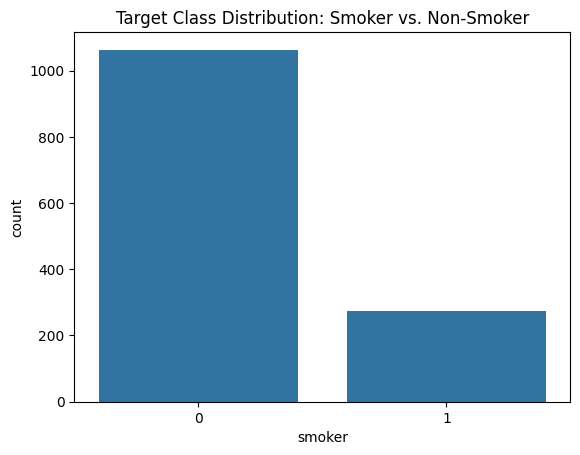

smoker
0    0.795064
1    0.204936
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x=y)
plt.title("Target Class Distribution: Smoker vs. Non-Smoker")
plt.show()

#Check actual counts
print(y.value_counts(normalize=True))


"Smoker" is a very unbalanced target variable, with only 20.49% of cases classified as smokers. The model may perform biasedly as a result of this imbalance, favoring the majority class (non-smokers) in its predictions.

Class_weight='balanced' was used in the logistic regression model to address this. This method helps the model better recognize smokers by adjusting weights during training to give the minority class (smokers) greater weight.

In [ ]:
#Train with class weights
lr_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_balanced.fit(X_train_scaled, y_train)
y_pred_bal = lr_balanced.predict(X_test_scaled)

In [ ]:
#Evaluate all metrics again
print("Balanced Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_bal))
print("Balanced Logistic Regression Precision:", precision_score(y_test, y_pred_bal))
print("Balanced Logistic Regression Recall:", recall_score(y_test, y_pred_bal))
print("Balanced Logistic Regression F1 Score:", f1_score(y_test, y_pred_bal))

Balanced Logistic Regression Accuracy: 0.9813432835820896
Balanced Logistic Regression Precision: 0.9166666666666666
Balanced Logistic Regression Recall: 1.0
Balanced Logistic Regression F1 Score: 0.9565217391304348


In [ ]:
#confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

#compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_bal)

#print the confusion matrix
print("Confusion Matrix:")
print(cm)

#print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bal, target_names=["Non-Smoker", "Smoker"]))


Confusion Matrix:
[[208   5]
 [  0  55]]

Classification Report:
              precision    recall  f1-score   support

  Non-Smoker       1.00      0.98      0.99       213
      Smoker       0.92      1.00      0.96        55

    accuracy                           0.98       268
   macro avg       0.96      0.99      0.97       268
weighted avg       0.98      0.98      0.98       268



By applying class_weight='balanced', the logistic regression model achieved an accuracy of 98.13%, a precision of 91.66%, a recall of 100% for the smoker class and an F1-score of 0.956. This means the model correctly identified every smoker in the test set, significantly reducing the risk of false negatives.

The confusion matrix confirms this, showing 0 false negatives and only 5 false positives. While this slightly reduced precision (91.66%), the trade-off resulted in perfect smoker recall, making the model highly sensitive to the minority class, which was actually the goal of rebalancing.


## 8. Improving with the Grid Search Logistic Regression and Regularization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}

#grid search with 5-fold cross-validation
grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

#predict using the best model
y_pred_grid = grid.best_estimator_.predict(X_test_scaled)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#evaluation metrics
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print("Precision:", precision_score(y_test, y_pred_grid))
print("Recall:", recall_score(y_test, y_pred_grid))
print("F1 Score:", f1_score(y_test, y_pred_grid))

Best Parameters: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9850746268656716
Precision: 0.9322033898305084
Recall: 1.0
F1 Score: 0.9649122807017544


In [ ]:
#confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_grid))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid, target_names=["Non-Smoker", "Smoker"]))


Confusion Matrix:
[[209   4]
 [  0  55]]

Classification Report:
              precision    recall  f1-score   support

  Non-Smoker       1.00      0.98      0.99       213
      Smoker       0.93      1.00      0.96        55

    accuracy                           0.99       268
   macro avg       0.97      0.99      0.98       268
weighted avg       0.99      0.99      0.99       268



Using Grid Search with 5-fold cross-validation, the best logistic regression configuration was found to be:
C=100, penalty='l1', solver='liblinear', class_weight='balanced'.

This model achieved an accuracy of 98.51%, a precision of 93.22%, a recall of 100%, and an F1-score of 0.9649 for smokers.

The confusion matrix confirms excellent results, with no false negatives and only 4 false positives.


## 9. AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Initialize AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_scaled, y_train)

#Predict
y_pred_ada = ada.predict(X_test_scaled)

In [ ]:
#Evaluation metrics
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("AdaBoost Precision:", precision_score(y_test, y_pred_ada))
print("AdaBoost Recall:", recall_score(y_test, y_pred_ada))
print("AdaBoost F1 Score:", f1_score(y_test, y_pred_ada))

AdaBoost Accuracy: 0.9626865671641791
AdaBoost Precision: 0.9411764705882353
AdaBoost Recall: 0.8727272727272727
AdaBoost F1 Score: 0.9056603773584906


In [ ]:
#confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada, target_names=["Non-Smoker", "Smoker"]))


Confusion Matrix:
[[210   3]
 [  7  48]]

Classification Report:
              precision    recall  f1-score   support

  Non-Smoker       0.97      0.99      0.98       213
      Smoker       0.94      0.87      0.91        55

    accuracy                           0.96       268
   macro avg       0.95      0.93      0.94       268
weighted avg       0.96      0.96      0.96       268



The AdaBoost model achieved an overall accuracy of 96.27%, a precision of 94.12%, recall of 87.27%, and an F1-score of 0.9057 for the smoker class. While the precision is slightly higher than that of the standard logistic regression model, the recall is lower (the model missed 7 smokers).

The confusion matrix reflects this trade-off: while false positives were less (3 non-smokers misclassified as smokers), the model produced 7 false negatives, failing to identify some actual smokers.

AdaBoost offers a balanced but slightly conservative approach, prioritizing precision over recall.


Overall, while AdaBoost performs competitively, it doesn't outperform the best-tuned logistic regression model, especially in recall and F1-score, which are key priorities in this classification task.

## 10. Resampling - Logistic Regression with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)



In [ ]:
#Train logistic regression WITHOUT class_weight
lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(X_smote, y_smote)

#Predict on original (unbalanced) test set
y_pred_smote = lr_smote.predict(X_test_scaled)


In [ ]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#evaluation metrics
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)

print("SMOTE Logistic Regression Accuracy:", round(accuracy, 4))
print("SMOTE Logistic Regression Precision:", round(precision, 4))
print("SMOTE Logistic Regression Recall:", round(recall, 4))
print("SMOTE Logistic Regression F1 Score:", round(f1, 4))


SMOTE Logistic Regression Accuracy: 0.9813
SMOTE Logistic Regression Precision: 0.9167
SMOTE Logistic Regression Recall: 1.0
SMOTE Logistic Regression F1 Score: 0.9565


In [ ]:
#confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote, target_names=["Non-Smoker", "Smoker"]))

[[208   5]
 [  0  55]]
              precision    recall  f1-score   support

  Non-Smoker       1.00      0.98      0.99       213
      Smoker       0.92      1.00      0.96        55

    accuracy                           0.98       268
   macro avg       0.96      0.99      0.97       268
weighted avg       0.98      0.98      0.98       268



SMOTE was applied to address the imbalance between smokers and non-smokers by generating synthetic examples of the minority class. This helped the model better learn smoker patterns without relying solely on class weighting.

SMOTE achieved similar performance to the class-weighted and grid-tuned models, proving to be a reliable data-level solution for handling class imbalance, while maintaining perfect recall and a high F1-score.

## 11. Model Performance Comparison Table

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#create a list of dictionaries for each model's results
results = [
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    },
    {
        "Model": "Balanced Logistic Regression",
        "Accuracy": accuracy_score(y_test, y_pred_bal),
        "Precision": precision_score(y_test, y_pred_bal),
        "Recall": recall_score(y_test, y_pred_bal),
        "F1 Score": f1_score(y_test, y_pred_bal)
    },
    {
        "Model": "Grid Search Logistic Regression",
        "Accuracy": accuracy_score(y_test, y_pred_grid),
        "Precision": precision_score(y_test, y_pred_grid),
        "Recall": recall_score(y_test, y_pred_grid),
        "F1 Score": f1_score(y_test, y_pred_grid)
    },
    {
        "Model": "AdaBoost",
        "Accuracy": accuracy_score(y_test, y_pred_ada),
        "Precision": precision_score(y_test, y_pred_ada),
        "Recall": recall_score(y_test, y_pred_ada),
        "F1 Score": f1_score(y_test, y_pred_ada)
    },
    {
        "Model": "Logistic Regression (SMOTE)",
        "Accuracy": accuracy_score(y_test, y_pred_smote),
        "Precision": precision_score(y_test, y_pred_smote),
        "Recall": recall_score(y_test, y_pred_smote),
        "F1 Score": f1_score(y_test, y_pred_smote)
    }
]

#create DataFrame
results_df = pd.DataFrame(results)

#rounding
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']] = results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].round(4)

#print the comparison table
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
                             Model  Accuracy  Precision  Recall  F1 Score
0              Logistic Regression    0.9627     0.9245  0.8909    0.9074
1     Balanced Logistic Regression    0.9813     0.9167  1.0000    0.9565
2  Grid Search Logistic Regression    0.9851     0.9322  1.0000    0.9649
3                         AdaBoost    0.9627     0.9412  0.8727    0.9057
4      Logistic Regression (SMOTE)    0.9813     0.9167  1.0000    0.9565


## 12. Final Answer

After evaluating several models, the best-performing configuration was obtained using Grid Search Logistic Regression with the following settings:

C = 100, Penalty = L1, Solver = liblinear, class_weight = 'balanced'

This model achieved the highest F1-score (0.9649), the perfect recall (1.00) and a strong precision (93.22%) and an accuracy (98.51%), making it the most balanced and effective model for detecting smokers in an imbalanced dataset.

Interestingly, the SMOTE-based logistic regression also performed very well, achieving the same recall (1.00), F1-score (0.9565), accuracy (98.13%), and precision (91.67%) as the class-weighted logistic model, proving it to be a reliable data-level alternative.

However, Grid Search performed the best, particularly in precision and overall accuracy.

## 13. Conclusion

To conclude and summarize, the Grid Search Logistic Regression model with tuned regularization and balanced class weights delivered the most accurate and fair classification of smokers and non-smokers. Its ability to combine perfect recall with high precision ensures both sensitivity and reliability, which is especially critical in healthcare applications where identifying smokers correctly can influence early intervention and policy decisions.

This model is recommended as the final choice for deployment, as it maintains robustness against class imbalance and generalizes well to unseen data.